<a href="https://colab.research.google.com/github/sriramanaa/Data-Analytics--Project/blob/main/CWC23_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving CWC2023.csv to CWC2023.csv


<ipython-input-1-e4650f4852d1>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Batting_Impact', y='Man of the Match', data=top_batting, palette='viridis')


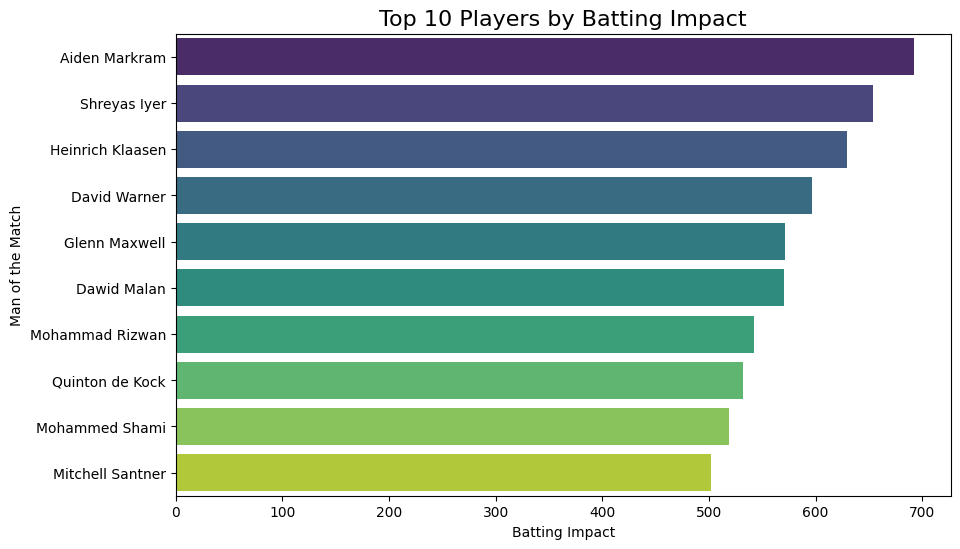

<ipython-input-1-e4650f4852d1>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bowling_Impact', y='Man of the Match', data=top_bowling, palette='coolwarm')


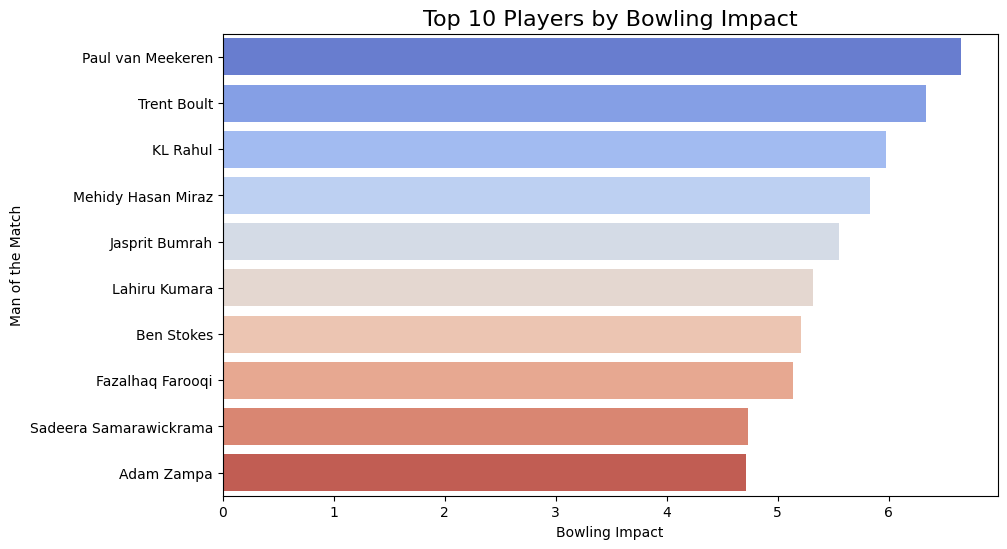

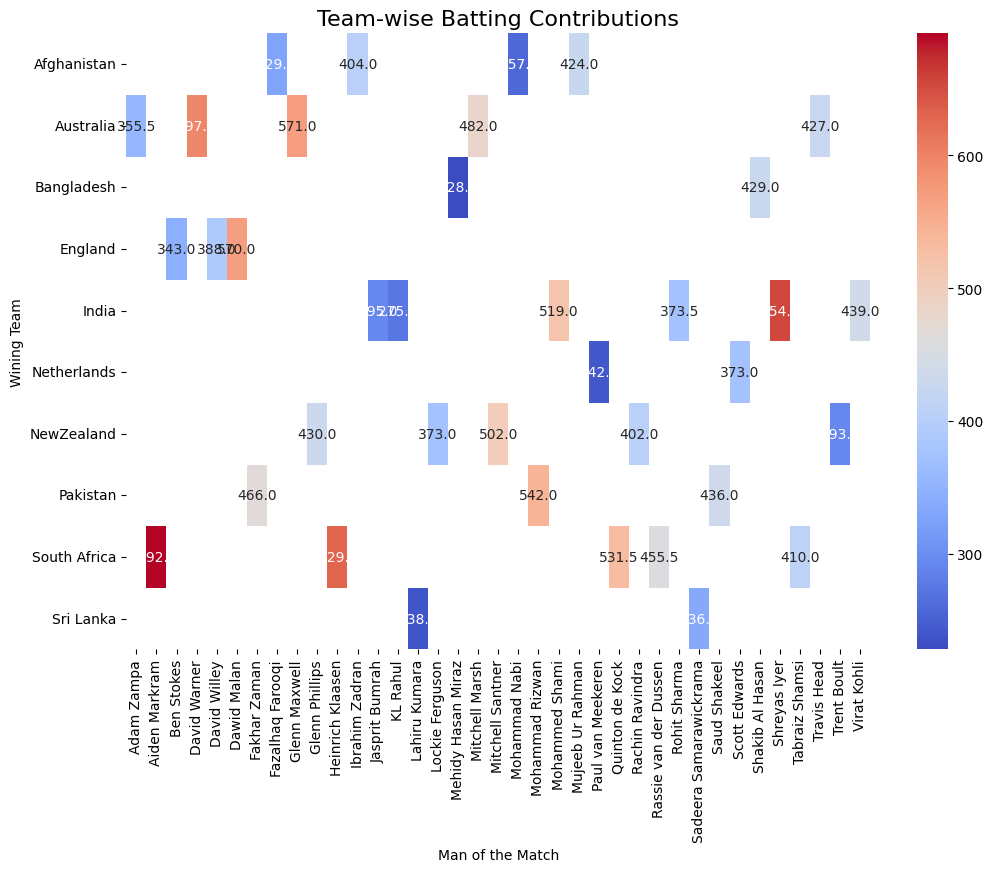

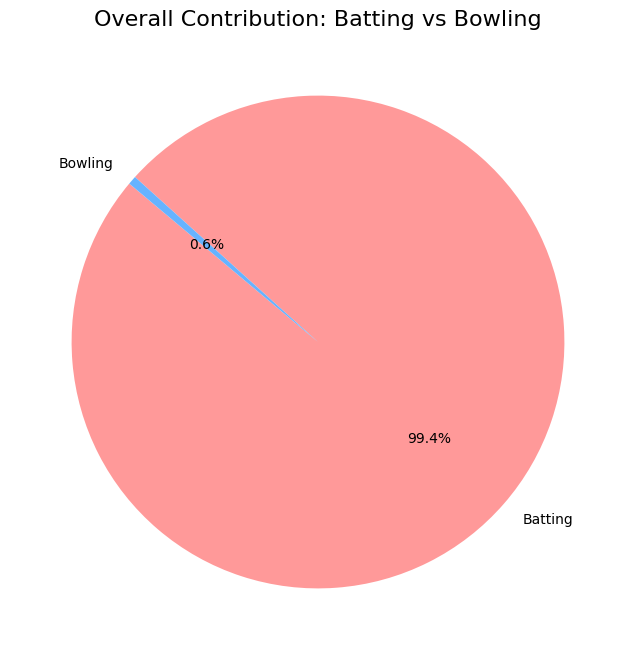

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analysis completed. Results saved to CSV files.


In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
from google.colab import files
uploaded = files.upload()  # Upload your CSV file here
df = pd.read_csv(next(iter(uploaded)))  # Load the uploaded file

# Step 3: Filter Matches with Winners
wins_df = df[df['Wining Team'].notnull()]

# Step 4: Clean the Data
wins_df = wins_df.drop_duplicates()  # Remove duplicate entries
wins_df.fillna(0, inplace=True)  # Replace missing values with 0

# Step 5: Feature Engineering
# Calculate batting and bowling impacts
wins_df['Batting_Impact'] = wins_df['Score A'] + (wins_df['4s A'] * 4) + (wins_df['6s A'] * 6)
wins_df['Bowling_Impact'] = wins_df['Wickets A'] - wins_df['Runrate A']

# Step 6: Aggregate Player Statistics
player_stats = wins_df.groupby('Man of the Match').agg(
    Batting_Impact=('Batting_Impact', 'mean'),
    Bowling_Impact=('Bowling_Impact', 'mean'),
    Matches_Played=('Match ID', 'nunique')
).reset_index()

# Step 7: Analyze Top Players
top_batting = player_stats.nlargest(10, 'Batting_Impact')
top_bowling = player_stats.nlargest(10, 'Bowling_Impact')

# Step 8: Team-wise Analysis
team_stats = wins_df.groupby(['Wining Team', 'Man of the Match']).agg(
    Batting_Impact=('Batting_Impact', 'mean'),
    Bowling_Impact=('Bowling_Impact', 'mean')
).reset_index()

# Step 9: Visualizations

# 9.1: Top 10 Players by Batting Impact
plt.figure(figsize=(10, 6))
sns.barplot(x='Batting_Impact', y='Man of the Match', data=top_batting, palette='viridis')
plt.title('Top 10 Players by Batting Impact', fontsize=16)
plt.xlabel('Batting Impact')
plt.ylabel('Man of the Match')
plt.show()

# 9.2: Top 10 Players by Bowling Impact
plt.figure(figsize=(10, 6))
sns.barplot(x='Bowling_Impact', y='Man of the Match', data=top_bowling, palette='coolwarm')
plt.title('Top 10 Players by Bowling Impact', fontsize=16)
plt.xlabel('Bowling Impact')
plt.ylabel('Man of the Match')
plt.show()

# 9.3: Team-wise Heatmap of Player Contributions
team_pivot = team_stats.pivot(index='Wining Team', columns='Man of the Match', values='Batting_Impact')

plt.figure(figsize=(12, 8))
sns.heatmap(team_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar=True)
plt.title('Team-wise Batting Contributions', fontsize=16)
plt.xlabel('Man of the Match')
plt.ylabel('Wining Team')
plt.show()

# 9.4: Pie Chart of Overall Contribution
total_batting = player_stats['Batting_Impact'].sum()
total_bowling = player_stats['Bowling_Impact'].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    [total_batting, total_bowling],
    labels=['Batting', 'Bowling'],
    autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff']
)
plt.title('Overall Contribution: Batting vs Bowling', fontsize=16)
plt.show()

# Step 10: Save the Results
player_stats.to_csv('player_contributions.csv', index=False)
team_stats.to_csv('team_contributions.csv', index=False)

from google.colab import files
files.download('player_contributions.csv')  # Download the player contributions file
files.download('team_contributions.csv')  # Download the team contributions file

print("Analysis completed. Results saved to CSV files.")


In [2]:
import plotly.express as px

# Step 1: Prepare the Data
# Ensure the data has columns for Batting Impact, Bowling Impact, and Matches Played
plot_data = player_stats.copy()
plot_data.rename(
    columns={
        "Batting_Impact": "Batting Impact",
        "Bowling_Impact": "Bowling Impact",
        "Matches_Played": "Matches Played",
        "Man of the Match": "Player"
    },
    inplace=True
)

# Step 2: Create a 3D Scatter Plot
fig = px.scatter_3d(
    plot_data,
    x="Batting Impact",
    y="Bowling Impact",
    z="Matches Played",
    color="Player",
    size="Matches Played",
    hover_name="Player",
    title="3D Interactive Plot of Player Performances",
    template="plotly_dark"
)

# Step 3: Customize the Layout
fig.update_layout(
    scene=dict(
        xaxis_title="Batting Impact",
        yaxis_title="Bowling Impact",
        zaxis_title="Matches Played",
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Step 4: Show the Plot
fig.show()


<ipython-input-3-139f5277141d>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




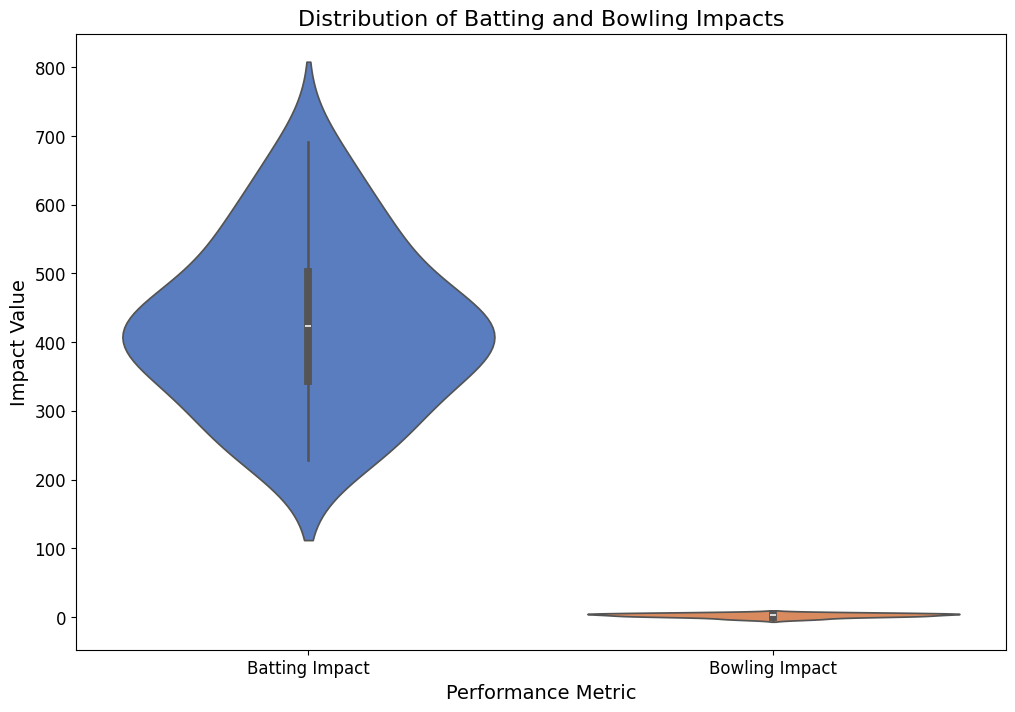

In [3]:
# Step 1: Prepare Data
# Ensure the player_stats DataFrame is ready
violin_data = player_stats.copy()
violin_data.rename(
    columns={
        "Batting_Impact": "Batting Impact",
        "Bowling_Impact": "Bowling Impact",
        "Matches_Played": "Matches Played",
        "Man of the Match": "Player"
    },
    inplace=True
)

# Step 2: Create the Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=violin_data.melt(value_vars=["Batting Impact", "Bowling Impact"]),
    x="variable",
    y="value",
    palette="muted"
)

# Step 3: Customize the Plot
plt.title("Distribution of Batting and Bowling Impacts", fontsize=16)
plt.xlabel("Performance Metric", fontsize=14)
plt.ylabel("Impact Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Step 4: Show the Plot
plt.show()


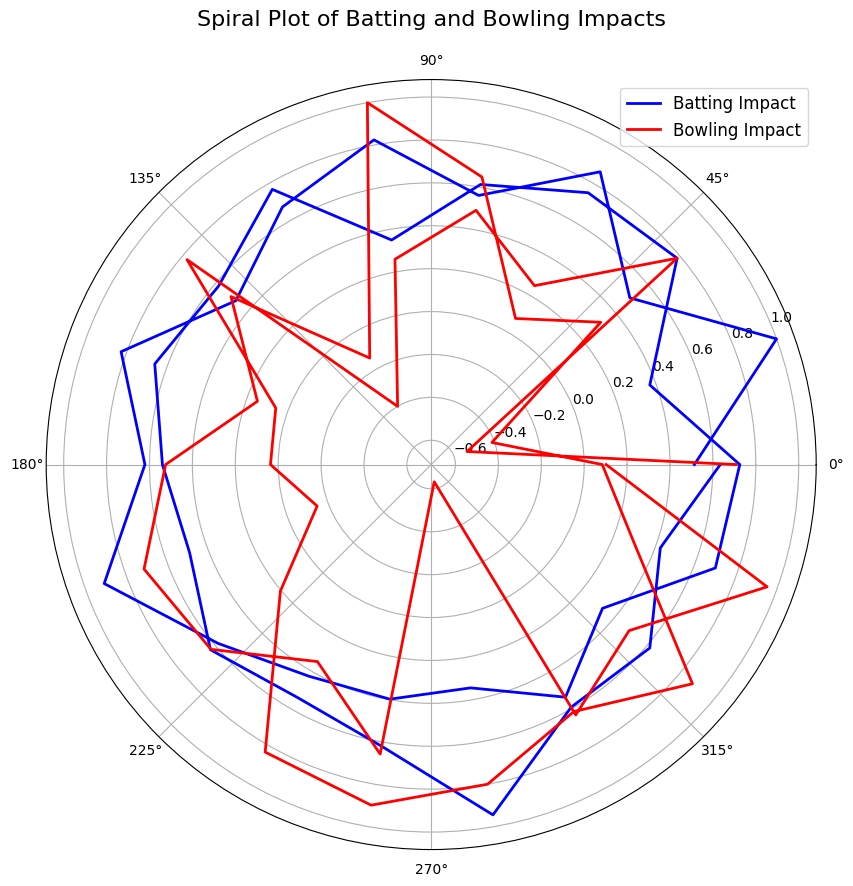

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare Data
spiral_data = player_stats.copy()
spiral_data.rename(
    columns={
        "Batting_Impact": "Batting Impact",
        "Bowling_Impact": "Bowling Impact",
        "Matches_Played": "Matches Played",
    },
    inplace=True
)

# Normalize impacts for better visualization
spiral_data["Normalized Batting Impact"] = spiral_data["Batting Impact"] / spiral_data["Batting Impact"].max()
spiral_data["Normalized Bowling Impact"] = spiral_data["Bowling Impact"] / spiral_data["Bowling Impact"].max()

# Step 2: Create Spiral Coordinates
theta = np.linspace(0, 4 * np.pi, len(spiral_data))  # Angle for the spiral
r_batting = spiral_data["Normalized Batting Impact"]  # Radius for Batting Impact
r_bowling = spiral_data["Normalized Bowling Impact"]  # Radius for Bowling Impact

# Step 3: Plot the Spiral
plt.figure(figsize=(10, 10))

# Spiral for Batting Impact
plt.polar(theta, r_batting, label="Batting Impact", color="blue", linewidth=2)

# Spiral for Bowling Impact
plt.polar(theta, r_bowling, label="Bowling Impact", color="red", linewidth=2)

# Step 4: Customize the Plot
plt.title("Spiral Plot of Batting and Bowling Impacts", fontsize=16, pad=20)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)

# Step 5: Show the Plot
plt.show()
